In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing_price.csv')

In [3]:
df.head()

,inverse age of flat (year-1),inverse distance to the nearest MRT station (km-1),price per square metre ($ in thousands)
0,0.160,7.404,8.913
1,0.114,1.789,6.308
2,0.049,1.379,5.963
3,0.046,1.373,5.511
4,0.183,15.948,9.774


In [4]:
df.isna().sum()

inverse age of flat (year-1)                          0
inverse distance to the nearest MRT station (km-1)    0
price per square metre ($ in thousands)               0
dtype: int64

In [5]:
df.shape

(30, 3)

##  MODEL 1

In [6]:
b = 1 # Starting value
rate = 0.005 # Set learning rate
precision = 0.005 # Stop algorithm when absolute difference between 2 consecutive x-values is less than precision
diff = 1 # difference between 2 consecutive iterates
max_iter = 1000 # set maximum number of iterations
iter = 1 # iterations counter

y = df['price per square metre ($ in thousands)']
x = df['inverse distance to the nearest MRT station (km-1)']

def f(b): 
    err = 1/30 * np.sum((y - b * x)**2)
    return err 

def deriv(b): 
    der =  1/15 * np.sum(-1 * x * (-b * x + y))
    return der

# Gradient Descent

while diff > precision and iter < max_iter:
    b_new = b - rate * deriv(b)
    print("Iteration ", iter, ": b-value is: ", b_new,"f(b) is: ", f(b_new) )
    diff = abs(b_new - b)
    iter = iter + 1
    b = b_new
    
print("The local minimum occurs at: ", b)

Iteration  1 : b-value is:  0.9010423613333334 f(b) is:  19.876355915500845
Iteration  2 : b-value is:  0.8544887822135493 f(b) is:  19.557677019777312
Iteration  3 : b-value is:  0.8325881411103171 f(b) is:  19.487149143238902
Iteration  4 : b-value is:  0.8222852151097522 f(b) is:  19.47154038647538
Iteration  5 : b-value is:  0.8174383120591628 f(b) is:  19.46808596108133
The local minimum occurs at:  0.8174383120591628


## MODEL 2

In [9]:
y = df['price per square metre ($ in thousands)']
x = df['inverse distance to the nearest MRT station (km-1)']


a = 5 # Initial point
b = 0 # Initial point
alpha = 0.01 # Learning rate
epsilon = 0.0001 # Stopping criterion constant
max_iters = 500 # Maximum number of iterations


def partiala(a,b): 
    return  -1/15 * np.sum(y - a - (b * x))

def partialb(a,b):
    return -1/15 * np.sum(x*(y - a - (b * x)))

def funcab(a,b):
    return 1/30 * np.sum((y - a - (b * x))**2)

next_func = funcab(a,b) # Initial value of function
print(next_func)
for n in range(max_iters):
    current_a = a
    current_b = b
    current_func = next_func
    a = current_a-alpha*partiala(current_a,current_b) # update of a
    b = current_b-alpha*partialb(current_a,current_b) # update of b
    next_func = funcab(a,b)
    change_func = abs(next_func-current_func) # stopping criterion: values of function converge
    print("Iteration",n+1,": a = ",a,", b = ",b,", f(a,b) = ",next_func)
    if change_func<epsilon:
        break
        
print("The local minimum occurs at: ",next_func)

7.857492466666668
Iteration 1 : a =  5.043246666666667 , b =  0.38712244866666673 , f(a,b) =  0.780890856816077
Iteration 2 : a =  5.0489227398255885 , b =  0.36013485463200157 , f(a,b) =  0.7419853296884641
Iteration 3 : a =  5.057044165229052 , b =  0.36119220344350383 , f(a,b) =  0.7354843584561308
Iteration 4 : a =  5.064902907834636 , b =  0.3603596453763446 , f(a,b) =  0.7292754888940826
Iteration 5 : a =  5.072683415968843 , b =  0.35966372731317875 , f(a,b) =  0.7232082716471083
Iteration 6 : a =  5.080374298571388 , b =  0.35896714888002396 , f(a,b) =  0.7172788309056878
Iteration 7 : a =  5.087977410766986 , b =  0.35827910748280284 , f(a,b) =  0.711484035039917
Iteration 8 : a =  5.095493698510485 , b =  0.3575988834643924 , f(a,b) =  0.7058208265400627
Iteration 9 : a =  5.102924157073127 , b =  0.3569264296793987 , f(a,b) =  0.7002862173396551
Iteration 10 : a =  5.110269766290896 , b =  0.3562616545468058 , f(a,b) =  0.6948772872248569
Iteration 11 : a =  5.11753149508646

Iteration 143 : a =  5.608148608256628 , b =  0.3112037896988899 , f(a,b) =  0.47305973782532895
Iteration 144 : a =  5.6097249967648795 , b =  0.31106112707825445 , f(a,b) =  0.47281063293714504
Iteration 145 : a =  5.611283384297112 , b =  0.31092009353978967 , f(a,b) =  0.47256718468584963
Iteration 146 : a =  5.612823976408705 , b =  0.3107806704808041 , f(a,b) =  0.472329264621371
Iteration 147 : a =  5.614346976307775 , b =  0.31064283951103255 , f(a,b) =  0.4720967472104618
Iteration 148 : a =  5.615852584881982 , b =  0.31050658245021084 , f(a,b) =  0.471869509770465
Iteration 149 : a =  5.6173410007250215 , b =  0.3103718813256772 , f(a,b) =  0.4716474324045842
Iteration 150 : a =  5.618812420162825 , b =  0.3102387183700022 , f(a,b) =  0.47143039793862035
Iteration 151 : a =  5.6202670372794525 , b =  0.3101070760186446 , f(a,b) =  0.4712182918591497
Iteration 152 : a =  5.621705043942696 , b =  0.3099769369076351 , f(a,b) =  0.4710110022531019
Iteration 153 : a =  5.62312662

## PLOTTING

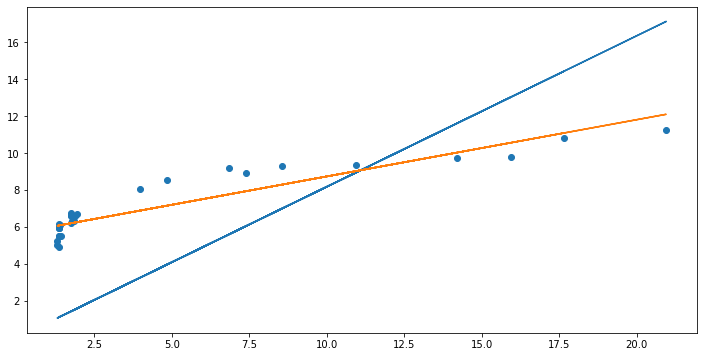

In [15]:
import matplotlib.pyplot as plt

y = df['price per square metre ($ in thousands)']
x = df['inverse distance to the nearest MRT station (km-1)']

# scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(x,y)
# model 1
y1 = 0.817 * x
plt.plot(x,y1)
# model 2
y2 = 5.66 + (0.307 * x)  
plt.plot(x,y2)
plt.show()

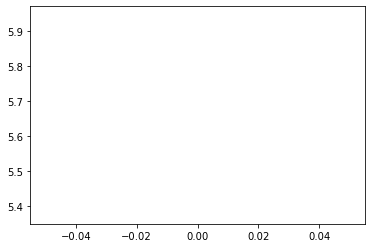

In [16]:
x = 0
y2 = 5.66 + (0.307 * x)  
plt.plot(x,y2)
plt.show()

## MODEL 3

In [13]:
y = df['price per square metre ($ in thousands)']
x = df['inverse distance to the nearest MRT station (km-1)']
w = df['inverse age of flat (year-1)']

a = 5 # Initial point
b = 0 # Initial point
c = 15 # Initial point
alpha = 0.01 # Learning rate
epsilon = 0.0001 # Stopping criterion constant
max_iters = 500 # Maximum number of iterations


def partiala(a,b,c): 
    return  -1/15 * np.sum(y - a - (b * x) - (c * w))

def partialb(a,b,c):
    return -1/15 * np.sum(x*(y - a - (b * x) - (c * w)))

def partialc(a,b,c):
    return -1/15 * np.sum(w*(y - a - (b * x) - (c * w)))


def funcabc(a,b,c):
    return 1/30 * np.sum((y - a - (b * x) - (c * w))**2)


next_func = funcabc(a,b,c) # Initial value of function
print(next_func)
for n in range(max_iters):
    current_a = a
    current_b = b
    current_c = c
    current_func = next_func
    a = current_a-alpha*partiala(current_a,current_b,current_c) # update of a
    b = current_b-alpha*partialb(current_a,current_b,current_c) # update of b
    c = current_c-alpha*partialc(current_a,current_b,current_c) # update of c

    next_func = funcabc(a,b,c)
    change_func = abs(next_func-current_func) # stopping criterion: values of function converge
    print("Iteration",n+1,": a = ",a,", b = ",b,", c = ",c,", f(a,b,c) = ",next_func)
    if change_func<epsilon:
        break
        
print("The local minimum occurs at: ",next_func)

1.4995219666666662
Iteration 1 : a =  5.009236666666666 , b =  0.16095187866666666 , c =  15.001921202 , f(a,b,c) =  0.28657559800178567
Iteration 2 : a =  5.0030233233657535 , b =  0.1505314751969971 , c =  15.00139402921774 , f(a,b,c) =  0.2782405165724917
Iteration 3 : a =  4.997923470129597 , b =  0.15174461772069642 , c =  15.001038226287875 , f(a,b,c) =  0.2755248808346796
Iteration 4 : a =  4.992811394551717 , b =  0.1521618113440116 , c =  15.00067580455667 , f(a,b,c) =  0.27289633183910794
Iteration 5 : a =  4.98776282530755 , b =  0.15262732098973186 , c =  15.000318795129177 , f(a,b,c) =  0.27032795142361854
Iteration 6 : a =  4.982771898834733 , b =  0.15308387107522883 , c =  14.999966323832185 , f(a,b,c) =  0.267818249859722
Iteration 7 : a =  4.97783830150402 , b =  0.15353541693787642 , c =  14.999618393660656 , f(a,b,c) =  0.2653658859201297
Iteration 8 : a =  4.972961350920054 , b =  0.15398175442606055 , c =  14.999274948681004 , f(a,b,c) =  0.26296954954999285
Itera

Iteration 99 : a =  4.699852261101005 , b =  0.17895531491522595 , c =  14.981535973886308 , f(a,b,c) =  0.17298343328936094
Iteration 100 : a =  4.698165800204981 , b =  0.17910926027286322 , c =  14.98144512106971 , f(a,b,c) =  0.1726974742000081
Iteration 101 : a =  4.696498677934837 , b =  0.17926143334308597 , c =  14.981355798901019 , f(a,b,c) =  0.17241804458247675
Iteration 102 : a =  4.694850672089952 , b =  0.17941185448960698 , c =  14.981267989782783 , f(a,b,c) =  0.1721449952512799
Iteration 103 : a =  4.693221563022796 , b =  0.17956054384215916 , c =  14.981181676319741 , f(a,b,c) =  0.17187818042952713
Iteration 104 : a =  4.691611133609597 , b =  0.17970752129918457 , c =  14.98109684131651 , f(a,b,c) =  0.1716174576710455
Iteration 105 : a =  4.690019169221342 , b =  0.17985280653049102 , c =  14.981013467775282 , f(a,b,c) =  0.17136268778427785
Iteration 106 : a =  4.688445457695114 , b =  0.1799964189798799 , c =  14.98093153889355 , f(a,b,c) =  0.17111373475792216
